# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Azis Malpo Matondang
- **Email:** azismalpoo@gmail.com
- **ID Dicoding:** azis_malpo_matondang

## Menentukan Pertanyaan Bisnis

- Apa hubungan antara tingkat kepuasan pelanggan dengan penjualan produk?
- Dimana lokasi geografis dengan tingkat penggunaan produk tertinggi?

## Import Semua Packages/Library yang Digunakan

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [18]:
customers_df = pd.read_csv("F:/belajar/python/tugas_akhir/E-Commerce Public Dataset/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [19]:
geolocation_df = pd.read_csv("F:/belajar/python/tugas_akhir/E-Commerce Public Dataset/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [20]:
order_items_df = pd.read_csv("F:/belajar/python/tugas_akhir/E-Commerce Public Dataset/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [21]:
order_payments_df = pd.read_csv("F:/belajar/python/tugas_akhir/E-Commerce Public Dataset/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [22]:
order_reviews_df = pd.read_csv("F:/belajar/python/tugas_akhir/E-Commerce Public Dataset/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [23]:
orders_df = pd.read_csv("F:/belajar/python/tugas_akhir/E-Commerce Public Dataset/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [24]:
product_category_name_translation_df = pd.read_csv("F:/belajar/python/tugas_akhir/E-Commerce Public Dataset/product_category_name_translation.csv")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [25]:
products_df = pd.read_csv("F:/belajar/python/tugas_akhir/E-Commerce Public Dataset/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [26]:
sellers_df = pd.read_csv("F:/belajar/python/tugas_akhir/E-Commerce Public Dataset/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Ada total 9 dataset dengan format csv
- xxx

### Assessing Data

In [27]:
customers_df.info()
customers_df.isna().sum()
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()
# tipe data aman
# tidak ada data yang kosong
# tidak ada data duplikat
# tidak ada keanehan pada nilai

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [28]:
geolocation_df.info()
geolocation_df.isna().sum()
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())
geolocation_df.describe()
# tipe data sudah sesuai
# tidak ada data kosong
# terdapat data duplikat sebanyak 261831
# tidak ada keanehan pada nilai pada data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [29]:
order_items_df.info()
order_items_df.isna().sum()
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe()
# kolom shipping_limit_date harus diganti ke date
# tidak ada data kosong
# tidak ada data duplikat
# tidak ada keanehan pada nilai data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [30]:
order_payments_df.info()
order_payments_df.isna().sum()
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())
order_payments_df.describe()
# order_id harus diganti ke int64
# tidak ada data kosong
# tidak ada data duplikat
# tidak ada keanehan pada nilai data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [31]:
order_reviews_df.info()
order_reviews_df.isna().sum()
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
order_reviews_df.describe()
# review_id, orderd_id harus ke int64, dan review_creation_date dan review_answer timestamp harus ke data
# terdapat data kosong pada kolom review comment_title dan review_comment_message
# tidak ada data duplikat
# tidak ada keanehan pada nilai data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [32]:
orders_df.info()
orders_df.isna().sum()
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()
# order_id, customer_id harus int64, dan 5 kolom terakhir harus ke date
# terdapat data kosong pada order_approved_at, order_delivered_carrier_date, order_delivered_customer_date,     
# tidak ada data duplikat
#                 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [33]:
product_category_name_translation_df.info()
product_category_name_translation_df.isna().sum()
print("Jumlah duplikasi: ", product_category_name_translation_df.duplicated().sum())
product_category_name_translation_df.describe()
# data aman

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [34]:
products_df.info()
products_df.isna().sum()
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()
# product_id ke int64
# ada data kosong

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [35]:
sellers_df.info()
sellers_df.isna().sum()
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
sellers_df.describe()
# seller id harus ke int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- masih banyak tipe data yang tidak sesuai
- terdapat data yang kosong

### Cleaning Data

In [36]:
# customers aman

In [37]:
geolocation_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


In [38]:
datetime_columns = ["shipping_limit_date"]
 
for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

In [39]:
# order payments aman

In [40]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]
 
for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [41]:
order_reviews_df.fillna(value="Recomendo", inplace=True)

In [42]:
order_reviews_df.isna().sum()


review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [43]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
 
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [44]:
orders_df.dropna(axis=0, inplace=True)


In [45]:
# produck category name sudah aman

In [46]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [47]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [48]:
products_df.product_category_name.value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

In [49]:
products_df.product_category_name.fillna(value="cama_mesa_banho", inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_14828\3624237326.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df.product_category_name.fillna(value="cama_mesa_banho", inplace=True)


In [50]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


In [51]:
products_df[products_df.product_name_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,cama_mesa_banho,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,cama_mesa_banho,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,cama_mesa_banho,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,cama_mesa_banho,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,cama_mesa_banho,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,cama_mesa_banho,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,cama_mesa_banho,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,cama_mesa_banho,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,cama_mesa_banho,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [52]:
products_df.product_name_lenght.value_counts()

product_name_lenght
60.0    2182
59.0    2025
58.0    1887
57.0    1719
55.0    1683
        ... 
66.0       1
72.0       1
67.0       1
76.0       1
6.0        1
Name: count, Length: 66, dtype: int64

In [53]:
products_df.product_name_lenght.fillna(value=60.0, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_14828\3665654861.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df.product_name_lenght.fillna(value=60.0, inplace=True)


In [54]:
products_df[products_df.product_name_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


In [55]:
products_df[products_df.product_description_lenght.isna()]


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,cama_mesa_banho,60.0,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,cama_mesa_banho,60.0,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,cama_mesa_banho,60.0,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,cama_mesa_banho,60.0,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,cama_mesa_banho,60.0,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,cama_mesa_banho,60.0,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,cama_mesa_banho,60.0,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,cama_mesa_banho,60.0,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,cama_mesa_banho,60.0,NaN,NaN,1300.0,45.0,16.0,45.0


In [56]:
products_df.product_description_lenght.value_counts()

product_description_lenght
404.0     94
729.0     86
651.0     66
703.0     66
236.0     65
          ..
2795.0     1
2308.0     1
3698.0     1
3522.0     1
2207.0     1
Name: count, Length: 2960, dtype: int64

In [57]:
products_df.product_description_lenght.fillna(value=404.0, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_14828\2819012782.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df.product_description_lenght.fillna(value=404.0, inplace=True)


In [58]:
products_df[products_df.product_description_lenght.isna()]


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


In [59]:
products_df[products_df.product_photos_qty.isna()]


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,cama_mesa_banho,60.0,404.0,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,cama_mesa_banho,60.0,404.0,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,cama_mesa_banho,60.0,404.0,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,cama_mesa_banho,60.0,404.0,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,cama_mesa_banho,60.0,404.0,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,cama_mesa_banho,60.0,404.0,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,cama_mesa_banho,60.0,404.0,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,cama_mesa_banho,60.0,404.0,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,cama_mesa_banho,60.0,404.0,NaN,1300.0,45.0,16.0,45.0


In [60]:
products_df.product_photos_qty.value_counts()

product_photos_qty
1.0     16489
2.0      6263
3.0      3860
4.0      2428
5.0      1484
6.0       968
7.0       343
8.0       192
9.0       105
10.0       95
11.0       46
12.0       35
13.0        9
15.0        8
17.0        7
14.0        5
18.0        2
20.0        1
19.0        1
Name: count, dtype: int64

In [61]:
products_df.product_photos_qty.fillna(value=1.0, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_14828\1000936588.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df.product_photos_qty.fillna(value=1.0, inplace=True)


In [62]:
products_df[products_df.product_photos_qty.isna()]


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


**Insight:**
- data yang tidak sesuai sudah diperbaiki
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

In [63]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [64]:
customers_df.groupby(by="customer_city").agg({
    "customer_id":  "nunique"
}).sort_values(by="customer_id", ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [65]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [66]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [67]:
orders_df.describe(include="all")


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,96461,96461,96461,96461,96461,96461,96461,96461,96461.000000
unique,96461,96461,2,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96455,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544,12.517007
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000
25%,NaN,NaN,NaN,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00,7.000000
50%,NaN,NaN,NaN,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00,10.000000
75%,NaN,NaN,NaN,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00,16.000000
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,210.000000


In [68]:
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
6094,9a5877f8f6e46206edde862c4e29839e,71d22bf9fac71149518769246203fca5,38444,araguari,MG,Active
79227,9e3fe122c953e6f616a2d6bb78307741,c94edc4af5621bb5f8c914b3aae0d428,6213,osasco,SP,Active
70702,4f3ada4edfb7f58e81325c5e59f1eab0,a59dc1bc590098f3c263f2334b8d152f,14091,ribeirao preto,SP,Active
26663,8aed06f4d390a477d19b1c263fb77fab,27f729c22e9c0292fa0f87c4c63956d0,72596,brasilia,DF,Active
87508,9da6601cf51fd84303b5696b59825d4f,6added102eb62fa2357569b518b5c0f6,52050,recife,PE,Active


In [69]:
customers_df.groupby(by="status").customer_id.count()

status
Active        96461
Non Active     2980
Name: customer_id, dtype: int64

In [70]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


In [71]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15044
1,rio de janeiro,6603
2,belo horizonte,2697
3,brasilia,2071
4,curitiba,1489
5,campinas,1406
6,porto alegre,1341
7,salvador,1188
8,guarulhos,1143
9,sao bernardo do campo,911


In [72]:
orders_customers_order_items_df = pd.merge(
    left=orders_customers_df,
    right=order_items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
orders_customers_order_items_product_df = pd.merge(
    left=orders_customers_order_items_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
orders_customers_order_items_product_product_category_name_df = pd.merge(
    left=orders_customers_order_items_product_df,
    right=product_category_name_translation_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
orders_customers_order_items_product_product_category_name_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,7c396fd4830fd04220f754e42b4e5bff,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,14.0,af07308b275d755c9edb36a90c618231,...,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,7c142cf63193a1473d2e66489a9ae977,...,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,3.0,72632f0f9dd73dfee390c9b22eb56dd6,...,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery


In [73]:
orders_customers_order_items_product_product_category_name_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).reset_index().head(10)


,product_category_name_english,product_id
0,bed_bath_table,3574
1,sports_leisure,2821
2,furniture_decor,2592
3,health_beauty,2397
4,housewares,2282
5,auto,1853
6,computers_accessories,1599
7,toys,1373
8,watches_gifts,1300
9,telephony,1112


In [74]:
orders_customers_order_items_product_product_category_name_df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_zip_code_prefix,order_item_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,110180,110180,110180,110180,110180,110180.000000,110180.000000,110180.000000,110180,110180.000000,110180.000000,110180.000000,110180.000000,110180.000000,110162.000000,110162.000000,110162.000000,110162.000000
mean,2018-01-02 03:09:05.618805760,2018-01-02 13:40:14.266463744,2018-01-05 09:57:40.877328128,2018-01-14 14:29:00.951887872,2018-01-25 22:27:00.620802304,12.431131,35155.850826,1.198212,2018-01-08 17:38:11.457660160,119.976817,19.948713,48.963823,781.976693,2.193937,2089.490868,30.141528,16.555464,22.985494
min,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000,1003.000000,1.000000,2016-09-19 23:11:33,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,2017-09-15 08:33:15.249999872,2017-09-15 14:25:19.750000128,2017-09-18 22:46:46.249999872,2017-09-26 20:26:16.249999872,2017-10-06 00:00:00,7.000000,11310.000000,1.000000,2017-09-21 15:05:55,39.900000,13.080000,43.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,2018-01-21 10:16:58.500000,2018-01-22 13:56:54,2018-01-24 18:59:21,2018-02-02 21:14:55,2018-02-16 00:00:00,10.000000,24344.000000,1.000000,2018-01-26 20:27:10.500000,74.900000,16.260000,52.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,2018-05-05 15:59:52,2018-05-05 22:30:47.500000,2018-05-08 14:20:00,2018-05-15 20:19:18,2018-05-28 00:00:00,16.000000,59066.000000,1.000000,2018-05-10 20:19:29.249999872,134.170000,21.150000,57.000000,981.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,210.000000,99980.000000,21.000000,2020-04-09 22:35:08,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000
std,NaN,NaN,NaN,NaN,NaN,9.449601,29901.214959,0.706726,NaN,182.309380,15.699220,10.024839,648.347200,1.715669,3741.366587,16.122188,13.409553,11.687560


In [75]:
orders_customers_order_items_product_product_category_name_df.sort_values(by="price", ascending=False)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
24537,0812eb902a67711a1cb742b3cdaa65ae,c6e2731c5b391845f6800c97401a43a9,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-02-16 09:23:13,2017-03-03 14:23:18,2017-03-09,19.0,dc4802a71eae9be1dd28f5d788ceb526,...,194.31,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares
31390,fefacc66af859508bf1a7934eab1e97f,f48d464a0baaea338cb25f816991ab1f,delivered,2018-07-25 18:10:17,2018-07-27 04:05:13,2018-08-03 14:42:00,2018-08-15 14:57:50,2018-08-10,21.0,459bef486812aa25204be022145caa62,...,193.21,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers
3848,f5136e38d1a14a4dbd87dff67da82701,3fd6777bbce08a352fddd04e4a7cc8f6,delivered,2017-05-24 18:14:34,2017-05-26 02:45:17,2017-05-26 11:20:47,2017-06-05 17:09:48,2017-06-28,12.0,ff4159b92c40ebe40454e3e6a7c35ed6,...,227.66,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art
59050,a96610ab360d42a2e5335a3998b4718a,df55c14d1476a9a3467f131269c2477f,delivered,2017-04-01 15:58:40,2017-04-03 13:25:18,2017-04-11 15:10:34,2017-04-17 11:04:45,2017-05-02,16.0,da122df9eeddfedc1dc1f5349a1a690c,...,151.34,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances
44660,199af31afc78c699f0dbf71fb178d4d4,24bbf5fd2f2e1b359ee7de94defc4a15,delivered,2017-04-18 18:50:13,2017-04-19 15:50:15,2017-04-25 13:39:59,2017-05-07 10:42:39,2017-05-15,19.0,eebb5dda148d3893cdaf5b5ca3040ccb,...,74.34,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98322,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28,15.0,4546caea018ad8c692964e3382debd19,...,7.89,beleza_saude,45.0,232.0,3.0,800.0,21.0,4.0,15.0,health_beauty
98323,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28,15.0,4546caea018ad8c692964e3382debd19,...,7.89,beleza_saude,45.0,232.0,3.0,800.0,21.0,4.0,15.0,health_beauty
58245,c5bdd8ef3c0ec420232e668302179113,5af78bf1a82a2660d1e3fd78c645f58f,delivered,2018-04-27 12:37:10,2018-04-28 02:55:22,2018-04-30 15:38:00,2018-05-05 16:22:05,2018-05-23,8.0,f006d7920bd71c252f61ec355eb50dcb,...,22.30,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction
92144,6e864b3f0ec71031117ad4cf46b7f2a1,9f9d249355f63c5c1216a82b802452c1,delivered,2018-04-24 20:15:21,2018-04-24 20:33:18,2018-04-25 13:36:00,2018-05-04 19:32:53,2018-05-18,10.0,b38211bd797f4fdd81a98b9d1754b606,...,18.23,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction


**Insight:**
- Jumlah pelanggan terbanyak ada di kota "sao paulo	" sebanyak 15.540
- Dari hasil di atas, rata-rata waktu pengiriman sebesar 12 hari dengan nilai maksimum 210 hari dan nilai minimim 1 hari
- Hampir semua pelanggan sudah pernah melakukan orderan
- Order terbanyak ada di dua kota yaitu sao paulo dan rio de janiero
- Orderan terbanyak adalah produk bed_bath_table sebanyak 3.574
- harga barang yang terjual berkisar antara 0.85 hingga 6.735 dollar
- barang termahal dan termurah adalah housewares dan construction_tools_construction


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Performa Penjualan dan Revenue Perusahaan dalam Beberapa Bulan Terakhir?

C:\Users\hp\AppData\Local\Temp\ipykernel_14828\2459640777.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = orders_customers_order_items_product_product_category_name_df.resample(rule='M', on='order_purchase_timestamp').agg({


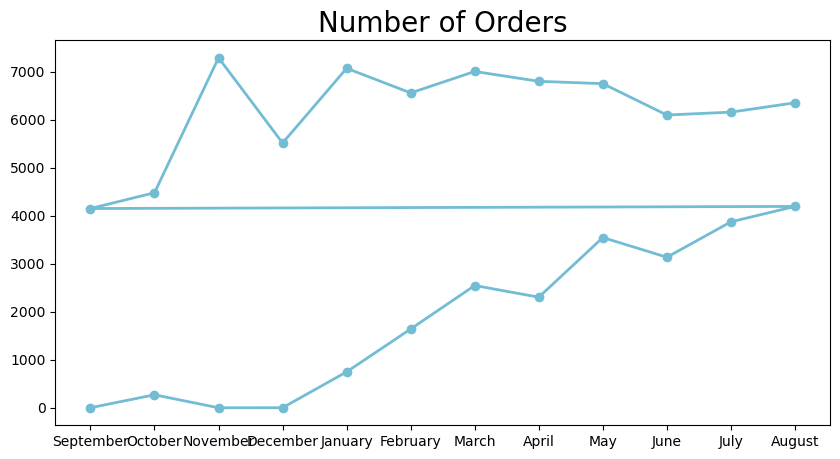

In [76]:
monthly_orders_df = orders_customers_order_items_product_product_category_name_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B') #mengubah format order date menjadi nama bulan
 
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)
 
plt.figure(figsize=(10, 5)) 
plt.plot(monthly_orders_df["order_purchase_timestamp"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4") 
plt.title("Number of Orders", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

### Pertanyaan 2:Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?

In [77]:
sum_order_items_df = orders_customers_order_items_product_product_category_name_df.groupby("product_category_name_english").order_purchase_timestamp.count().sort_values(ascending=False).reset_index()
sum_order_items_df.head(15)

,product_category_name_english,order_purchase_timestamp
0,bed_bath_table,12488
1,health_beauty,9467
2,sports_leisure,8429
3,furniture_decor,8156
4,computers_accessories,7643
5,housewares,6795
6,watches_gifts,5857
7,telephony,4428
8,garden_tools,4267
9,auto,4139


**Insight:**
- produk paling banyak dan paling sedikit terjual adalah bed_bath_table dan electronics
- penjualan terbanyak ada di bulan november dan agustus

## Analisis Lanjutan (Opsional)

In [79]:
rfm_df = orders_customers_order_items_product_product_category_name_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
 
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,288
1,000161a058600d5901f007fab4c27140,1,54.90,409
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,547
3,0002414f95344307404f0ace7a26f1d5,1,149.90,378
4,000379cdec625522490c315e70c7a9fb,1,93.00,149


C:\Users\hp\AppData\Local\Temp\ipykernel_14828\1210342829.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\hp\AppData\Local\Temp\ipykernel_14828\1210342829.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\hp\AppData\Local\Temp\ipykernel_14828\1210342829.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the 

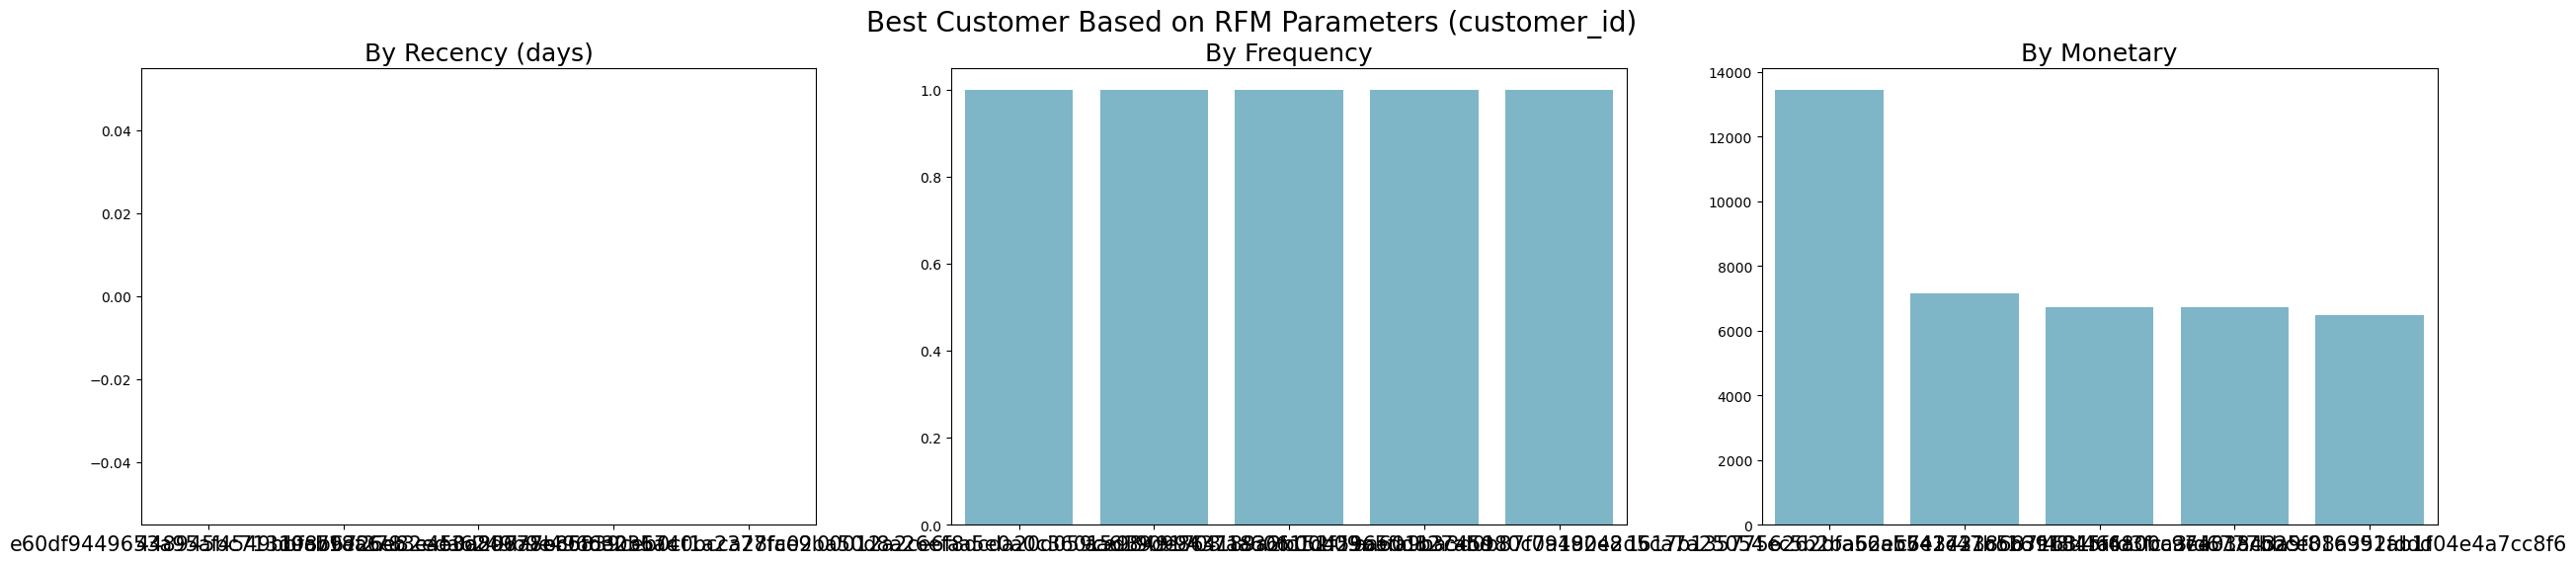

In [80]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
 
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

## Conclusion

- produk paling banyak dan paling sedikit terjual adalah bed_bath_table dan electronics
- penjualan terbanyak ada di bulan november dan agustus

In [78]:
orders_customers_order_items_product_product_category_name_df.to_csv("all_data.csv", index=False)
